In [1]:
#Importning necessery libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
#3 hidden layer NN
class NeuralNetwork(object):
    
    def __init__(self):
        self.learning_rate = 0.001
        self.epochs = 701
        self.reg = 0.0001
        self.batch_size = 256
    
    def relu(self, x):
        return np.maximum(x, 0)
    
    def relu_der(self, x):
        return 1. * (x > 0)
    
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    
    def softmax_loss(self, x, y):
        logs = -np.log(x[range(x.shape[0]), np.argmax(y, axis=1)])
        data_loss = np.sum(logs) / x.shape[0]
        reg_loss = 0.5 * self.reg * np.sum(self.W1**2) + 0.5 * self.reg * np.sum(self.W2**2) +  0.5 * self.reg * np.sum(self.W3**2)
        loss = data_loss + reg_loss
        return loss
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        #defining weights
        
        self.W1 = np.random.randn(X.shape[1], 500) /  np.sqrt(X.shape[1])
        self.b1 = np.zeros((1,500)) / np.sqrt(500)
        self.W2 = np.random.randn(500, 500) /  np.sqrt(500)
        self.b2 = np.zeros((1,500)) / np.sqrt(500)
        self.W3 = np.random.randn(500, 500) /  np.sqrt(500)
        self.b3 = np.zeros((1,500)) / np.sqrt(500)
        self.W4 = np.random.randn(500, y.shape[1]) /  np.sqrt(500)
        self.b4 = np.zeros((1, y.shape[1])) / np.sqrt(y.shape[1])
        
        loss_history = []
        for i in range(self.epochs):
            inx = np.random.choice(X.shape[0], self.batch_size, replace=True)
            X_batch = self.X_train[inx, :]
            y_batch = self.y_train[inx]
            
            l1, l2, l3, scores = self.forward(X_batch)
            
            loss = self.softmax_loss(scores, y_batch)
            loss_history.append(loss)
            if (i % 100 == 0):
                print("Epoche ", i, " of ", self.epochs, " Loss: ", loss)
            
            #backprop
            #we can do like this because of using ONE HOT ECODING
            dscores = scores - y_batch
            dW4 = np.dot(l3.T, dscores)
            db4 = np.sum(dscores, axis=0, keepdims=True)
            dl3 = np.dot(dscores, self.W4.T) * self.relu_der(l3)
            dW3 = np.dot(l2.T, dl3)
            db3 = np.sum(dl3, axis=0, keepdims=True)
            dl2 = np.dot(dl3, self.W3.T) * self.relu_der(l2)
            dW2 = np.dot(l1.T, dl2)
            db2 = np.sum(dl2, axis=0, keepdims=True)
            dl1 = np.dot(dl2, self.W2.T) * self.relu_der(l1)
            dW1 = np.dot(X_batch.T, dl1)
            db1 = np.sum(dl1, axis=0, keepdims=True)
            
            
            #reg
            dW4 += self.reg * self.W4
            dW3 += self.reg * self.W3
            dW2 += self.reg * self.W2
            dW1 += self.reg * self.W1
            
            #update first SGD
            self.W4 += -self.learning_rate * dW4
            self.b4 += -self.learning_rate * db4
            self.W3 += -self.learning_rate * dW3
            self.b3 += -self.learning_rate * db3
            self.W2 += -self.learning_rate * dW2
            self.b2 += -self.learning_rate * db2
            self.W1 += -self.learning_rate * dW1
            self.b1 += -self.learning_rate * db1
        return loss_history
    
    def forward(self, X):
        l1 = self.relu(np.dot(X, self.W1) + self.b1)
        l2 = self.relu(np.dot(l1, self.W2) + self.b2)
        l3 = self.relu(np.dot(l2, self.W3) + self.b3)
        yHat = self.softmax(np.dot(l3, self.W4) + self.b4)
        return l1, l2, l3, yHat
        
    def predict(self, X):
        _,_,_, scores = self.forward(X)
        pred = np.argmax(scores, axis=1)
        return pred

In [3]:
minst = input_data.read_data_sets("/tmp/data/", one_hot=True)
X_train = minst.train.images
y_train = minst.train.labels
X_test = minst.test.images
y_test = minst.test.labels


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
nn = NeuralNetwork()
loss_ = nn.fit(X_train, y_train)

Epoche  0  of  701  Loss:  2.38191604664
Epoche  100  of  701  Loss:  0.34149612145
Epoche  200  of  701  Loss:  0.222572600199
Epoche  300  of  701  Loss:  0.251075764649
Epoche  400  of  701  Loss:  0.263237864718
Epoche  500  of  701  Loss:  0.227471616136
Epoche  600  of  701  Loss:  0.162975138499
Epoche  700  of  701  Loss:  0.181699039952


In [5]:
def accuracy(y_test, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        helper_int = 0
            
        if y_pred[i] == y_test[i]:
            correct += 1
            
    return correct/len(y_pred) * 100

In [6]:
pred = nn.predict(X_test)
print(accuracy(pred, np.argmax(y_test, axis=1)), "%")

96.71 %


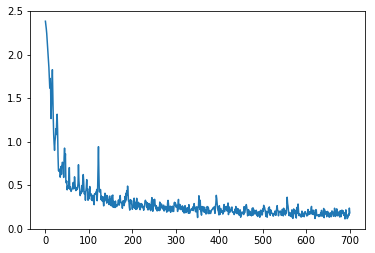

In [7]:
plt.plot(loss_)
plt.show()

In [8]:
import pickle
x_train, y_train, x_test, y_test = pickle.load(open('sentiment_set.pickle', 'rb'))

In [9]:
nn = NeuralNetwork()
x_train = np.array(x_train)
y_train = np.array(y_train)
loss_txt = nn.fit(x_train, y_train)

Epoche  0  of  701  Loss:  0.767983191311
Epoche  100  of  701  Loss:  0.721302769645
Epoche  200  of  701  Loss:  0.701454214589
Epoche  300  of  701  Loss:  0.617968540916
Epoche  400  of  701  Loss:  0.606311987719
Epoche  500  of  701  Loss:  0.519001042588
Epoche  600  of  701  Loss:  0.504806398199
Epoche  700  of  701  Loss:  0.392165523533


In [10]:
x_test = np.array(x_test)
y_test = np.array(y_test)
# print(y_test[0])
pred = nn.predict(x_test)
print(accuracy(pred, np.argmax(y_test, axis=1)), "%")

63.508442776735464 %


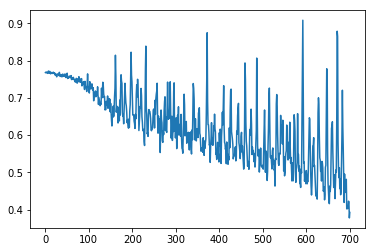

In [18]:
plt.plot(loss_txt)
plt.show()